# Assignment 1A - Question 2

## Classification

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC, NuSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy.stats import norm
from sklearn import tree

### Import files
Files imported using pandas.read_csv

Check values using .head()

In [2]:
train = pandas.read_csv('CAB420_Assessment_1A_Data/Data/Q2/training.csv')
test = pandas.read_csv('CAB420_Assessment_1A_Data/Data/Q2/testing.csv')
train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [3]:
test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


### Plot data for train and test to Box Plot and standardised Box Plot

Code taken from Week 3 Example 1

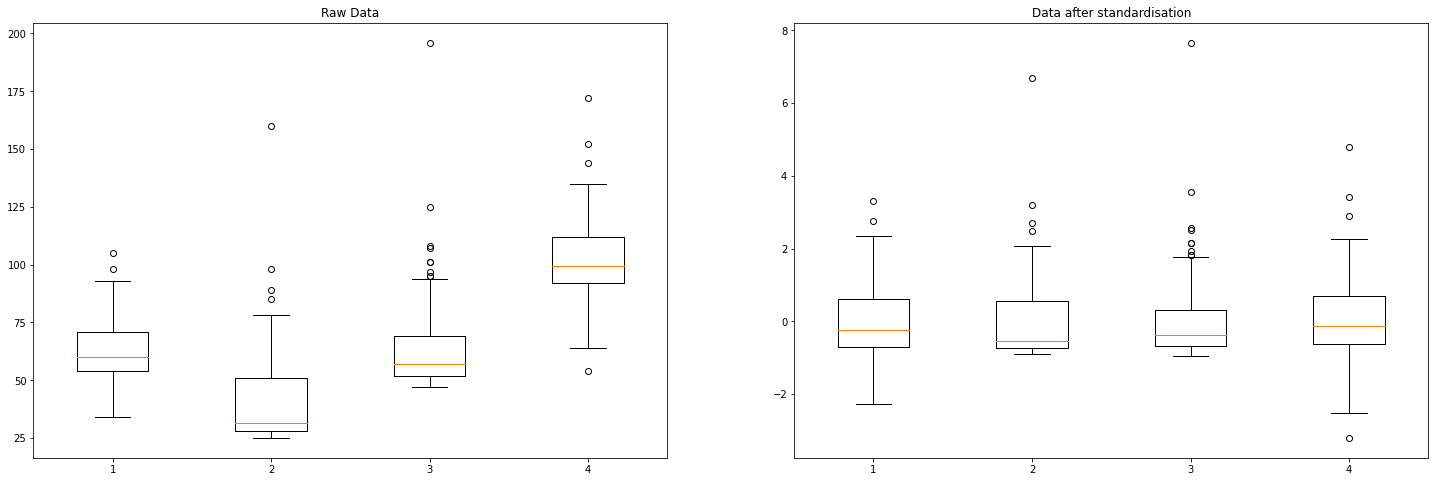

In [4]:
# get the data, we'll just grab 2 dimensions
X = train.iloc[:, 1:5].to_numpy()
train.iloc[:, 0] = train.iloc[:, 0].astype("category")
Y = train.iloc[:, 0].cat.codes.to_numpy()

# plot box plot for the data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X)
ax.set_title('Raw Data')

# standardise data
mu = numpy.mean(X, 0)
sigma = numpy.std(X, 0)
X = (X - mu) / sigma

# box plot after standardisation
ax = fig.add_subplot(1, 2, 2)
ax.boxplot(X)
ax.set_title('Data after standardisation');

X_train = X
Y_train = Y

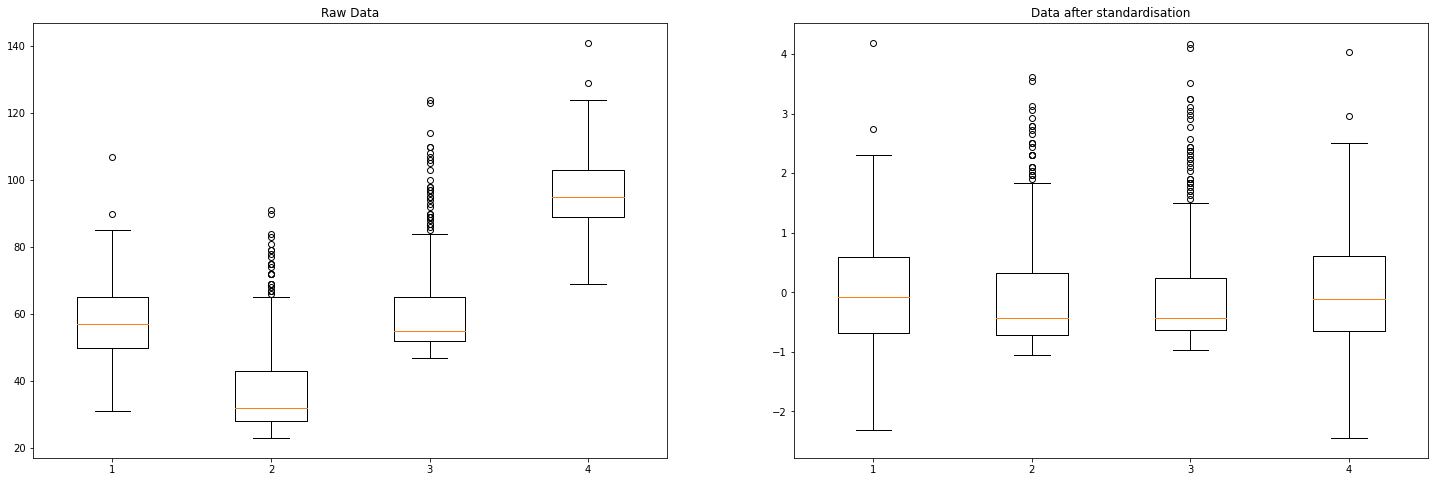

In [5]:
# get the data, we'll just grab 2 dimensions
X = test.iloc[:, 1:5].to_numpy()
test.iloc[:, 0] = test.iloc[:, 0].astype("category")
Y = test.iloc[:, 0].cat.codes.to_numpy()

# plot box plot for the data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X)
ax.set_title('Raw Data')

# standardise data
mu = numpy.mean(X, 0)
sigma = numpy.std(X, 0)
X = (X - mu) / sigma

# box plot after standardisation
ax = fig.add_subplot(1, 2, 2)
ax.boxplot(X)
ax.set_title('Data after standardisation');

### Split test data into testing and validation sets

Split testing set (50%) and validation set (50%)

Code taken from Week 3 Example 1

In [6]:
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=0.7, random_state=0)

### Check train and test data to confirm size

In [7]:
X_train.shape

(198, 4)

In [8]:
X_test.shape

(97, 4)

### Evaluate models using confusion matrix

Code taken from Week 3 Example 2

In [9]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - compute the overall classification accuracy on the testing data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = plot_confusion_matrix(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = plot_confusion_matrix(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));

### Evaluate basic SVC model

Code taken from Week 3 Example 2

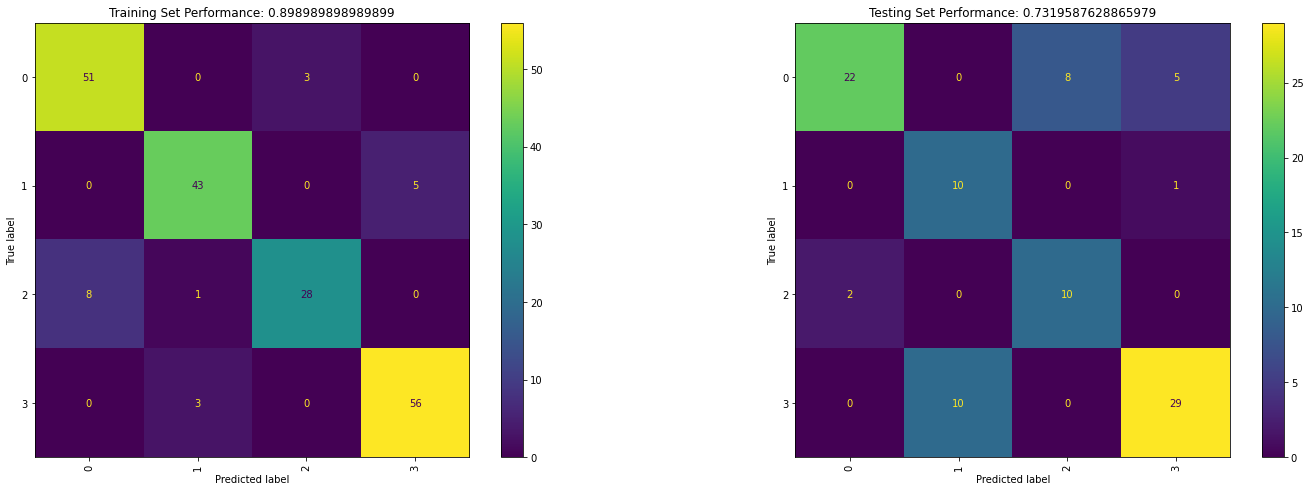

In [10]:
svm = SVC()
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

### Set param grid to find best values

Code taken from Week 3 Example 2

## used training data

In [11]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear'],'class_weight':['balanced','None']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001, 'scale'], 'kernel': ['rbf'],'class_weight':['balanced','None']},
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [3, 4, 5, 6], 'kernel': ['poly'],'class_weight':['balanced','None']},
 ]
svm = SVC()

grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_val, Y_val)
grid_search.cv_results_

alidation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\class_weight.py", line 63, in compute_class_weight
    raise ValueError("class_weight must be dict, 'balanced', or None,"
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\AppData\Local\

, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --],
              mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True, 

### Use best values found from param grid as values for SVC

Code taken from Week 3 Example 2

{'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}


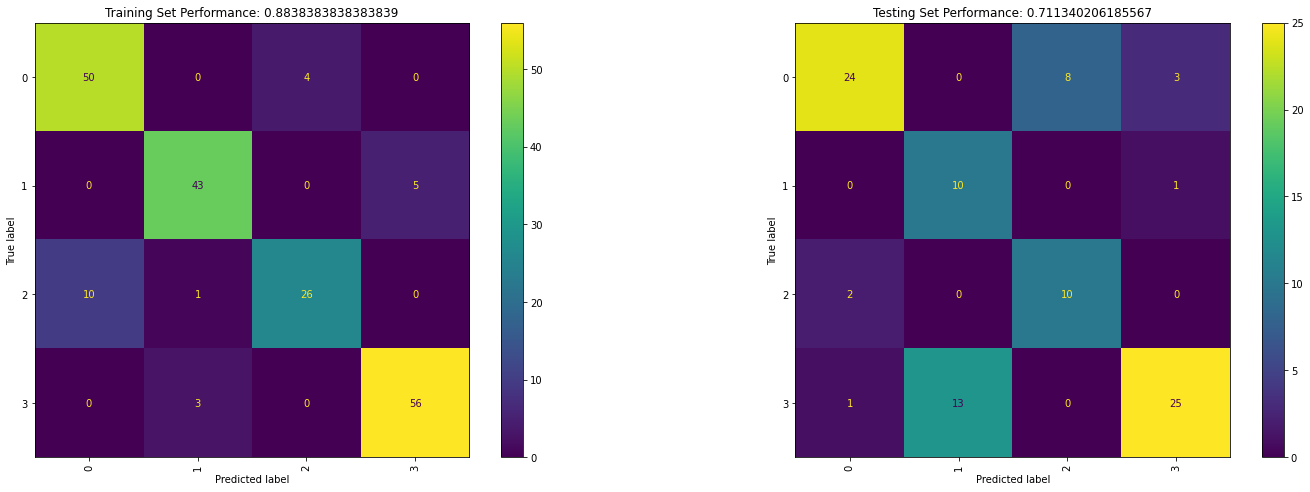

In [12]:
best_system = numpy.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
svm = SVC().set_params(**params)
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)


### validate using the validation set

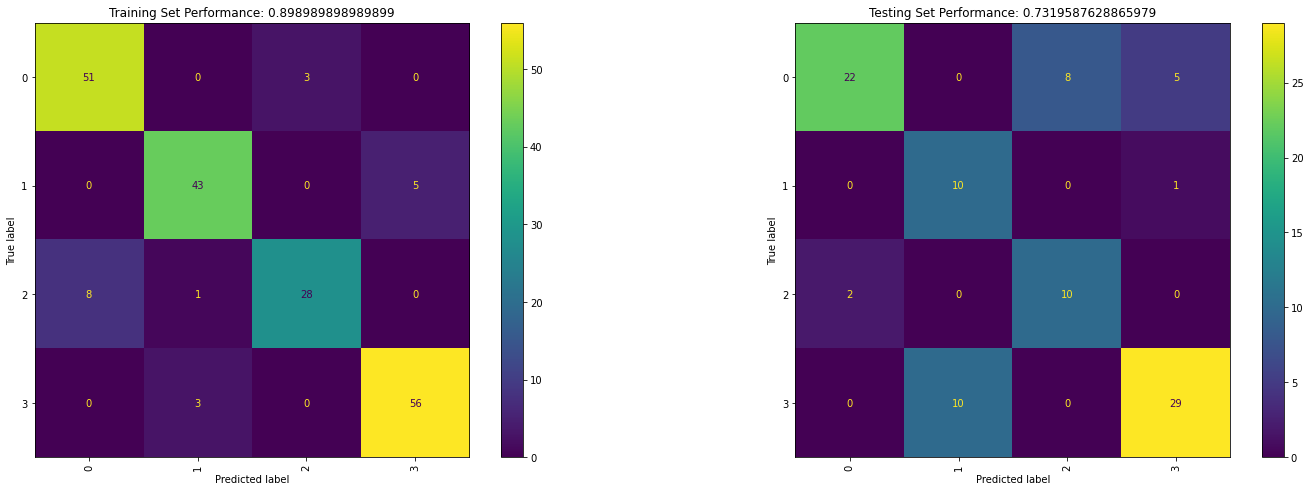

In [13]:
svm2 = SVC()
svm2.fit(X_train, Y_train)
eval_model(svm2, X_train, Y_train, X_test, Y_test)


### Evaluate model using NuSVC

Code taken from Week 3 Example 2

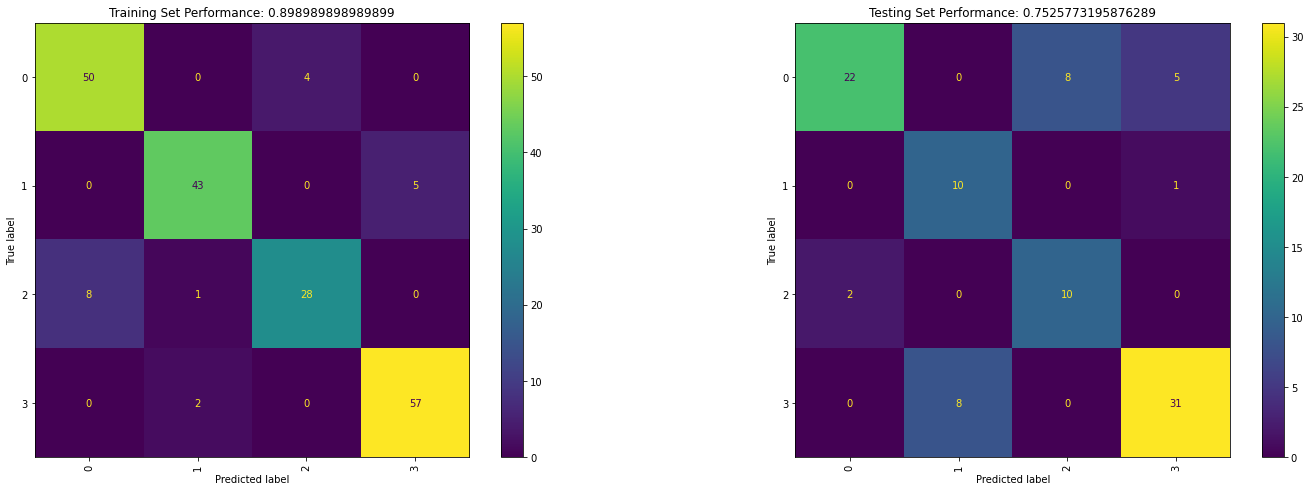

In [14]:
nu_svm = NuSVC()
nu_svm.fit(X_train, Y_train)
eval_model(nu_svm, X_train, Y_train, X_test, Y_test)

In [15]:
param_grid = [
  {'nu':[0.1,0.15,0.2,0.25], 'kernel': ['linear'],'class_weight':['balanced','None']},
  {'nu':[0.1,0.15,0.2,0.25], 'gamma': [0.15, 0.125, 0.1, 0.075, 0.05, 0.0025], 'kernel': ['rbf'],'class_weight':['balanced','None']},
  {'nu':[0.1,0.15,0.2,0.25], 'degree': [3, 4, 5, 6], 'kernel': ['poly'],'class_weight':['balanced','None']},
 ]
svm = NuSVC()

grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_val, Y_val)
grid_search.cv_results_

ck (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\class_weight.py", line 63, in compute_class_weight
    raise ValueError("class_weight must be dict, 'balanced', or None,"
ValueError: class_weight must be d

e, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_nu': masked_array(data=[0.1, 0.15, 0.2, 0.25, 0.1, 0.15, 0.2, 0.25, 0.1, 0.15,
                    0.2, 0.25, 0.1, 0.15, 0.2, 0.25, 0.1, 0.15, 0.2, 0.25,
                    0.1, 0.15, 0.2, 0.25, 0.1, 0.15, 0.2, 0.25, 0.1, 0.15,
                    0.2, 0.25, 0.1, 0.15, 0.2, 0.25, 0.1, 0.15, 0.2, 0.25,
                    0.1, 0.15, 0.2, 0.25, 0.1, 0.15, 0.2, 0.25, 0.1, 0.15,
                    0.2, 0.25, 0.1, 0.15, 0.2, 0.25, 0.1, 0.15, 0.2, 0.25,
                    0.1, 0.15, 0.2, 0.25, 0.1, 0.15, 0.2, 0.25, 0.1, 0.15,
                    0.2, 0.25, 0.1, 0.15, 0.2, 0.25, 0.1, 0.15, 0.2, 0.25,
                    0.1, 0.15, 0.2, 0.25, 0.1, 0.15, 0.2, 0.25],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
    

{'class_weight': 'balanced', 'gamma': 0.075, 'kernel': 'rbf', 'nu': 0.25}


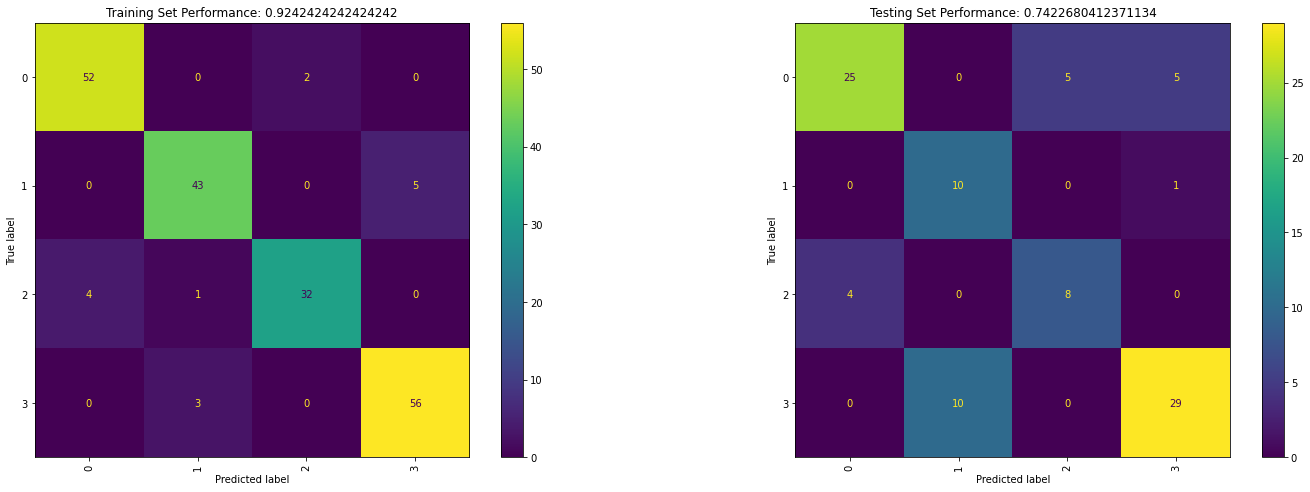

In [16]:
best_system = numpy.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
svm = NuSVC().set_params(**params)
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

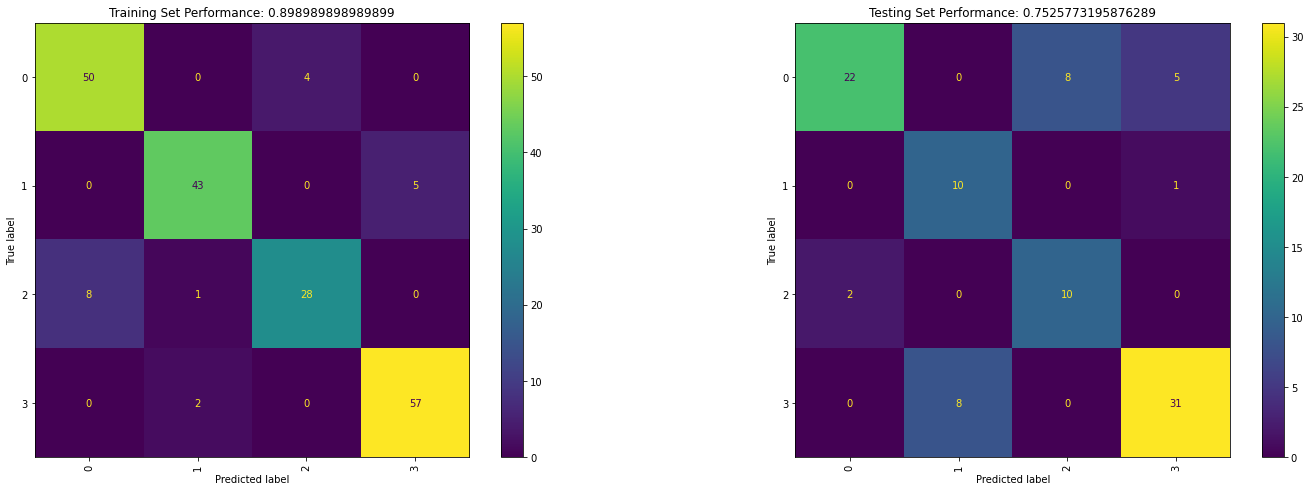

In [17]:
svm2 = NuSVC()
svm2.fit(X_train, Y_train)
eval_model(svm2, X_train, Y_train, X_test, Y_test)

### Evaluate K Nearest Neighbours model

Code taken from Week 3 Example 2

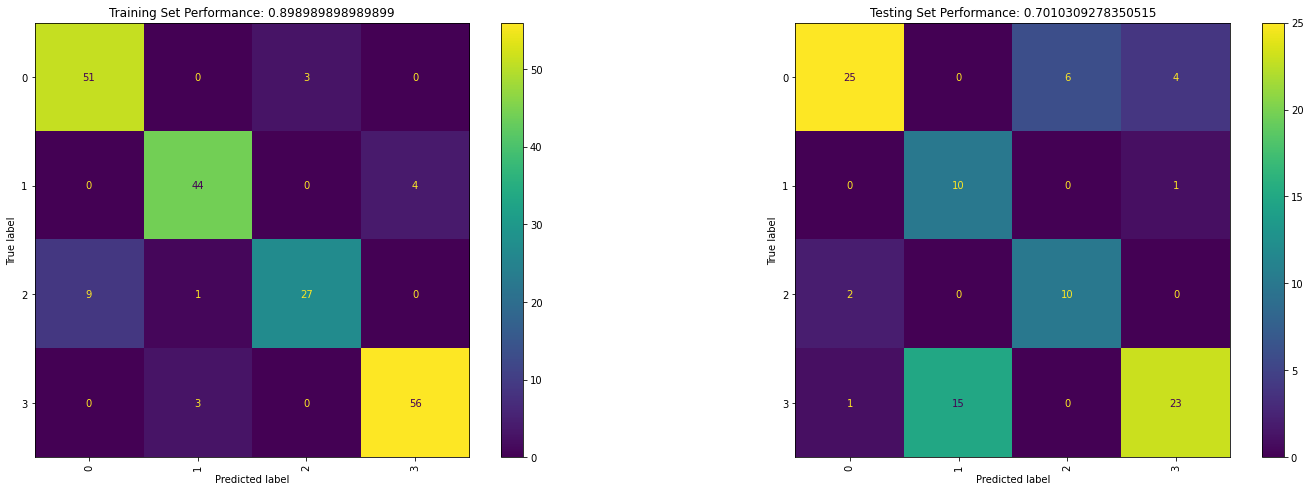

In [18]:
cknn = KNeighborsClassifier()
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

### Find best values for K Nearest Neighbours

Code taken from Week 3 Example 2

In [19]:
param_grid = [
   {'n_neighbors' : list(range(1,21)), 'weights' : ['uniform', 'distance']}
 ]
cknn = KNeighborsClassifier()

grid_search = GridSearchCV(cknn, param_grid)
grid_search.fit(X_val, Y_val)
grid_search.cv_results_

{'mean_fit_time': array([0.00059571, 0.00059752, 0.00049624, 0.00049596, 0.00039687,
        0.00039687, 0.00049572, 0.00039635, 0.00029793, 0.00050139,
        0.00039697, 0.00049596, 0.00049605, 0.00039678, 0.00049596,
        0.00049596, 0.00039668, 0.00039635, 0.00039663, 0.00049601,
        0.00059533, 0.00049605, 0.00049834, 0.00049586, 0.00029821,
        0.00029764, 0.00039678, 0.00049577, 0.00050197, 0.00049605,
        0.00049601, 0.00039673, 0.00049109, 0.00049605, 0.0003026 ,
        0.00039668, 0.00039692, 0.00049553, 0.00050139, 0.0004961 ]),
 'std_fit_time': array([1.98650990e-04, 1.97542844e-04, 1.90734863e-07, 2.33601546e-07,
        1.98435805e-04, 1.99102931e-04, 4.62310777e-07, 1.98173580e-04,
        2.43257653e-04, 1.06698641e-05, 1.98483546e-04, 1.78416128e-07,
        1.16800773e-07, 1.98388465e-04, 1.78416128e-07, 3.81469727e-07,
        1.98340552e-04, 1.98174383e-04, 1.98316832e-04, 1.90734863e-07,
        1.98364430e-04, 4.42200589e-07, 4.50957886e-06, 3.162

### Evaluate K Nearest Neighbours using best values

Code taken from Week 3 Example 2

{'n_neighbors': 9, 'weights': 'distance'}


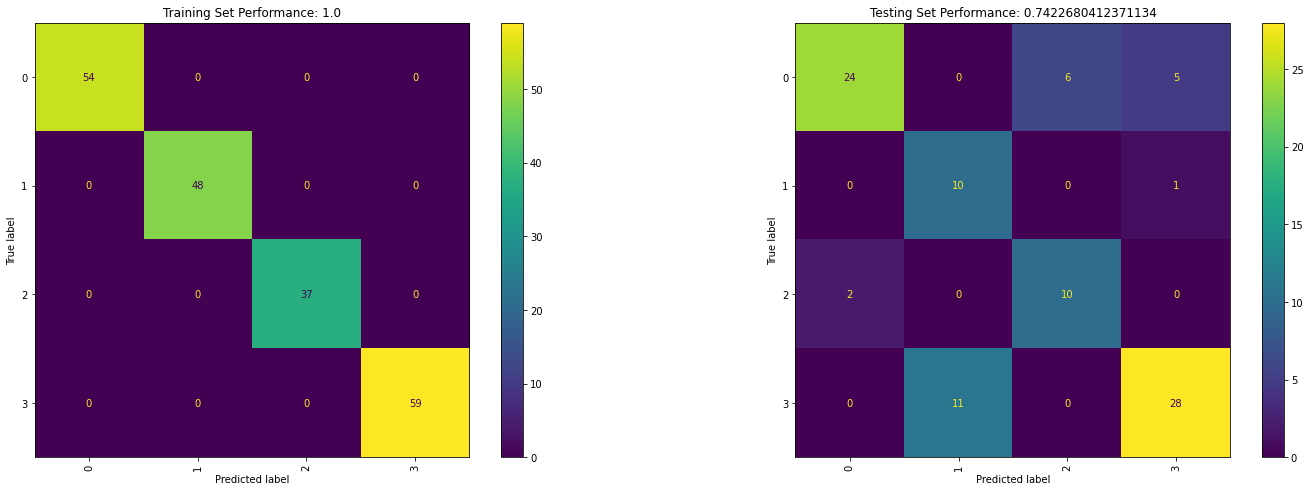

In [20]:
best_system = numpy.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
cknn = KNeighborsClassifier().set_params(**params)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

### validate 

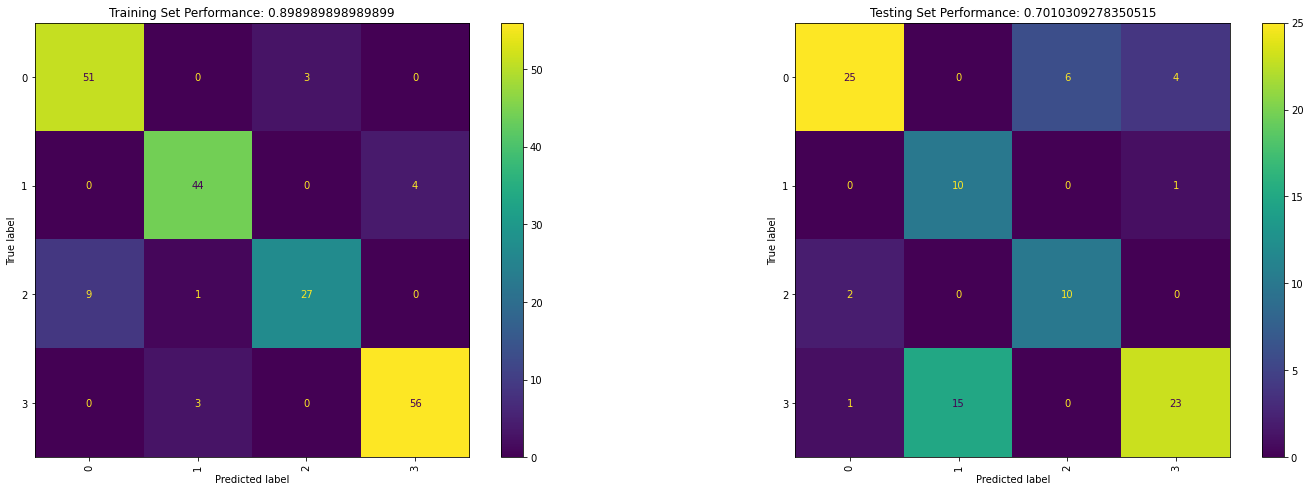

In [21]:
cknn2 = KNeighborsClassifier()
cknn2.fit(X_train, Y_train)
eval_model(cknn2, X_train, Y_train, X_test, Y_test)

### Default RFC

Code taken from Week 3 Example 2

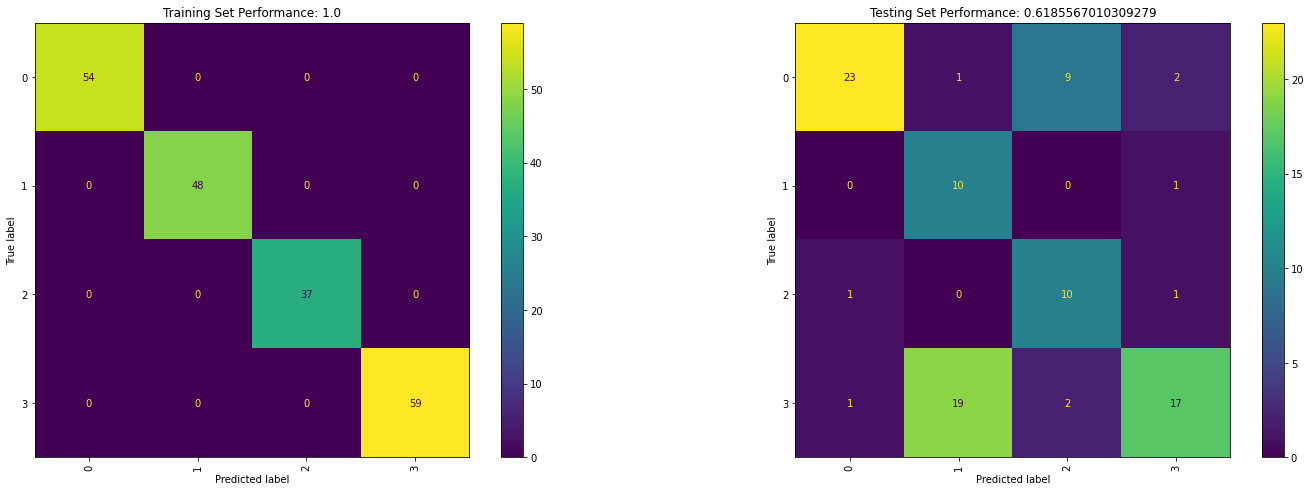

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)


### Find optimal values 


In [23]:
rf = RandomForestClassifier()
params = { 'n_estimators' : [1,10,50,100,250],'max_depth' : list(range(1,21)),'class_weight': ['balanced', 'balanced_subsample', 'None']}
grid_search = GridSearchCV(rf, params)
grid_search.fit(X_val, Y_val)
grid_search.cv_results_

ocal\Programs\Python\Python38-32\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\ensemble\_forest.py", line 582, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_

0435, 0.91304348, 0.91304348,
        0.76086957, 0.91304348, 0.91304348, 0.91304348, 0.89130435,
        0.60869565, 0.89130435, 0.89130435, 0.89130435, 0.89130435,
        0.7173913 , 0.91304348, 0.89130435, 0.91304348, 0.89130435,
        0.80434783, 0.86956522, 0.89130435, 0.91304348, 0.89130435,
        0.84782609, 0.89130435, 0.91304348, 0.91304348, 0.91304348,
        0.84782609, 0.84782609, 0.91304348, 0.91304348, 0.91304348,
        0.7826087 , 0.89130435, 0.91304348, 0.91304348, 0.91304348,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan

{'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 50}


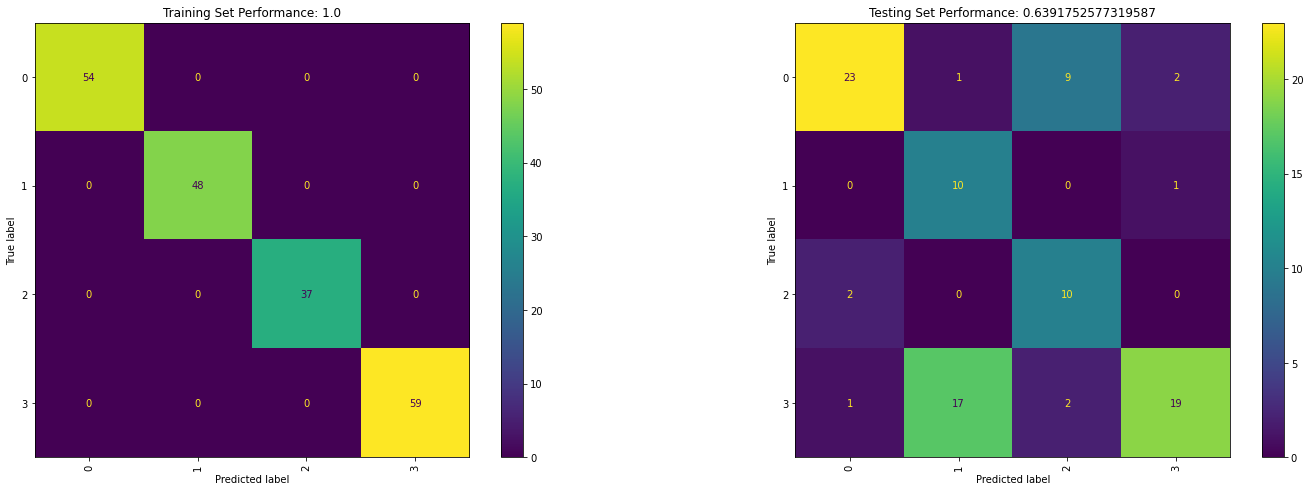

In [24]:
best_system = numpy.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
rf = RandomForestClassifier().set_params(**params)
rf.fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

### verify using valiation

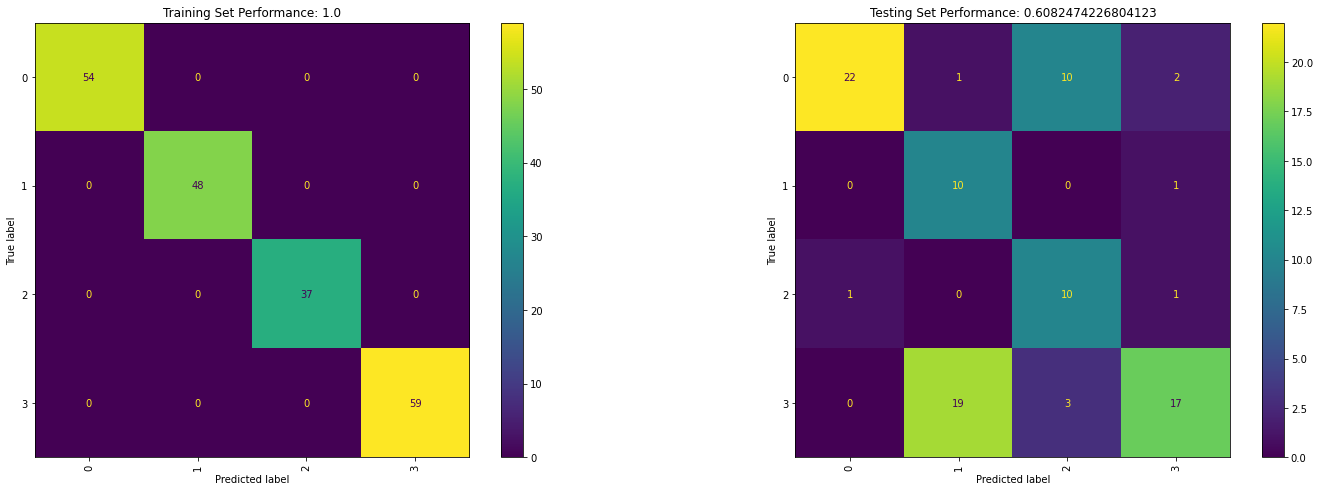

In [25]:
rf2 = RandomForestClassifier()
rf2.fit(X_train, Y_train)
eval_model(rf2, X_train, Y_train, X_test, Y_test)